In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt
import sklearn
from collections import Counter

In [2]:
from tools import *

In [3]:
city_2020 = pd.read_csv(r'CDP_Data\Cities\Cities Responses\2020_Full_Cities_Dataset.csv')

In [4]:
required_columns = ['Account Number', 'Response Answer']


In [28]:
filt = (city_2020["Question Number"] == "1.0a") & (city_2020["Column Number"] == 1)
city_2020_q1_0a = city_2020[filt]

In [55]:
country = city_2020_q1_0a.groupby(['Country'])
region = city_2020_q1_0a.groupby(['CDP Region'])
count_by_country = country['Organization'].nunique().sort_values(ascending = False)
count_by_region = region['Organization'].nunique().sort_values(ascending = False)

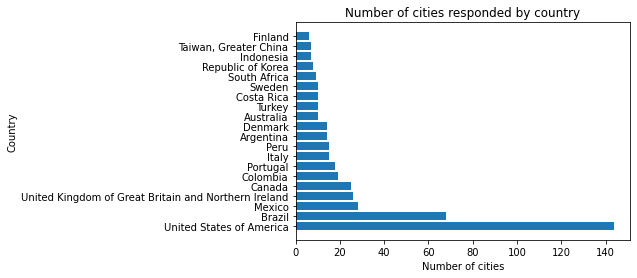

In [56]:
plt.barh(count_by_country.index[0:20],count_by_country[0:20])
plt.xlabel("Number of cities")
plt.ylabel("Country")
plt.title("Number of cities responded by country")
plt.show()

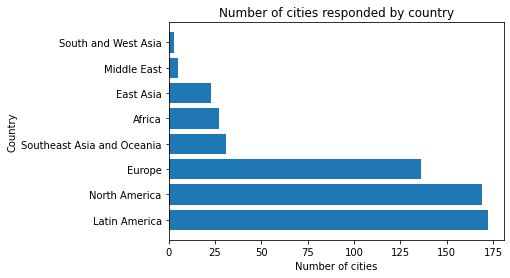

In [51]:
plt.barh(count_by_region.index,count_by_region)
plt.xlabel("Number of cities")
plt.ylabel("CDP Region")
plt.title("Number of cities responded by CDP Region")
plt.show()

In [ ]:
# Creating a dataframe with necessary general information llike population and land area

In [5]:
ques1 = [0.5, 0.6]
cols1 = [1, 1]

# ques3 = [13.0]
# cols3 = [1]

# ques2 = ['4.6a', '4.6a', '4.6a', '4.6a', '4.6a', '4.6a', '4.6a', '4.6a', '4.6a', '4.6a', 12.1]
# cols2 = [1] * 11
# rows2 = [13, 31, 20, 2, 28, 29, 18, 26, 1, 19, 2]

addtional_columns = ['Account Number', 'Organization', 'Country', 'CDP Region']

In [6]:
city_object = cdp(city_2020)
temp1 = city_object.queries(questions = ques1, colnums = cols1, required_columns = required_columns, rownums = None)
# temp2 = city_object.queries(questions = ques2, colnums = cols2, required_columns = required_columns, rownums = rows2)
final_df = city_object.process(addtional_columns)
final_df.head(3)

,Organization,Country,CDP Region,Current population,Land area of the city boundary as defined in question 0.1 (in square km)
Account Number,,,,,
68296,Hobsons Bay City Council,Australia,Southeast Asia and Oceania,96470,64
8242,City of Helsinki,Finland,Europe,655395,214.25
73301,"City of Gretna, LA",United States of America,North America,17935,4.47


In [7]:
final_df.rename(columns = {'Land area of the city boundary as defined in question 0.1 (in square km)': 'Land area'}, inplace = True)
final_df = final_df.replace({"Question not applicable": 0})
final_df = final_df[final_df.columns].fillna(0)

In [8]:
refer_df = final_df[['Current population', 'Organization', 'Land area']]

In [ ]:
# Indentifying the major goals of cities

In [9]:
filt = (city_2020["Question Number"] == "1.0a") & (city_2020["Column Number"] == 1)
city_2020_q1_0a = city_2020[filt]
city_2020_q1_0a["Response Answer"] = [item.replace("Other, please specify: ", "") if "Other, please specify: " in str(item) else item for item in list(city_2020_q1_0a["Response Answer"])]

C:\Users\maruf\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
city_2020_q1_0a_gb = city_2020_q1_0a.groupby(["Organization", 'Response Answer'])
city_2020_q1_0a_reponse = city_2020_q1_0a_gb.count()
goals = city_2020_q1_0a_reponse.reset_index()['Response Answer']
c = Counter(goals)
major_goals = c.most_common()[0:7]
del(major_goals[4])


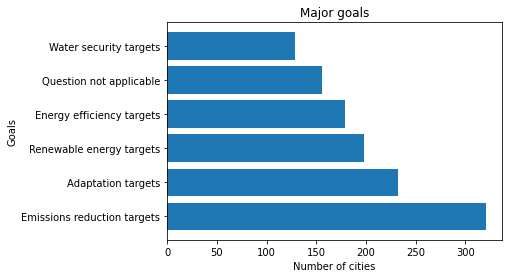

In [11]:
# Top goals
x = []
y = []
for item in major_goals:
    x.append(item[0])
    y.append(item[1])

plt.barh(x,y)
plt.xlabel("Number of cities")
plt.ylabel("Goals")
plt.title("Major goals")
plt.show()

In [12]:
responses_org = city_2020_q1_0a_reponse.reset_index()[["Organization", 'Response Answer']]
combined_df = pd.merge(responses_org, refer_df, on='Organization', how='outer')
combined_df = combined_df.astype({'Current population': 'int32'})
combined_df_gb = combined_df[["Response Answer", "Current population"]].groupby(["Response Answer"])
result_df = combined_df_gb.sum().reset_index().sort_values(by = "Current population", ascending = False)

In [13]:
filt = (result_df['Response Answer'] == 'Emissions reduction targets') | (result_df['Response Answer'] == 'Adaptation targets') | (result_df['Response Answer'] == 'Renewable energy targets') | (result_df['Response Answer'] == 'Energy efficiency targets')  | (result_df['Response Answer'] == 'Water security targets')
goals_population = result_df[filt]

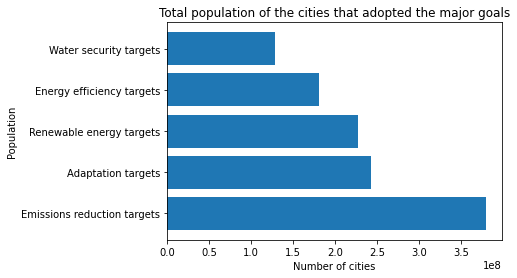

In [14]:
plt.barh(goals_population['Response Answer'],goals_population['Current population'])
plt.xlabel("Number of cities")
plt.ylabel("Population")
plt.title("Total population of the cities that adopted the major goals")
plt.show()

In [ ]:
# Indentifying major hazards

In [15]:
filt = (city_2020["Question Number"] == "2.1") & (city_2020["Column Number"] == 1) & (city_2020["Column Name"] == "Climate Hazards")
city_2020_2_1 = city_2020[filt]
city_2020_2_1_gb = city_2020_2_1.groupby(["Response Answer", 'CDP Region'])
city_2020_2_1_response = city_2020_2_1_gb['Organization'].count().reset_index()
city_2020_2_1_pivot = city_2020_2_1_response.pivot(index='Response Answer', columns='CDP Region', values='Organization')

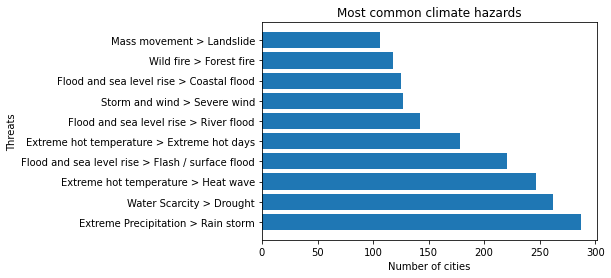

In [16]:
# Most common hazards
common_threats = pd.DataFrame(city_2020_2_1_response.groupby(["Response Answer"])['Organization'].sum().sort_values(ascending=False)[0:10]).reset_index()
plt.barh(common_threats['Response Answer'],common_threats['Organization'])
plt.xlabel("Number of cities")
plt.ylabel("Threats")
plt.title("Most common climate hazards")
plt.show()

In [17]:
major_threats = {}
for col in city_2020_2_1_pivot.columns:
    important = city_2020_2_1_pivot[col].sort_values(ascending = False).index
    important = [str(item) for item in important[0:5]]
    vals = city_2020_2_1_pivot[col].sort_values(ascending = False)[0:5]
    vals = [str(item) for item in vals]
    if "nan" not in vals:
        major_threats[col] = important
    else:
        major_threats[col] = important[0:vals.index("nan")-1]

In [18]:
# Major hazards in Africa region
major_threats['Africa']

['Water Scarcity > Drought',
 'Extreme Precipitation > Rain storm',
 'Flood and sea level rise > Flash / surface flood',
 'Extreme hot temperature > Extreme hot days',
 'Extreme hot temperature > Heat wave']

In [19]:
# Major hazards in Europe region
major_threats['Europe']

['Extreme hot temperature > Heat wave',
 'Extreme Precipitation > Rain storm',
 'Flood and sea level rise > Flash / surface flood',
 'Flood and sea level rise > River flood',
 'Water Scarcity > Drought']

In [20]:
# Major hazards in Middle East region
major_threats['Middle East']

['Water Scarcity > Drought',
 'Extreme Precipitation > Rain storm',
 'Extreme hot temperature > Heat wave',
 'Extreme hot temperature > Extreme hot days',
 'Flood and sea level rise > Coastal flood']

In [21]:
# Major hazards in North America region
major_threats['North America']

['Extreme hot temperature > Extreme hot days',
 'Extreme Precipitation > Rain storm',
 'Water Scarcity > Drought',
 'Flood and sea level rise > Flash / surface flood',
 'Extreme hot temperature > Heat wave']